In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from plotly.subplots import make_subplots


In [27]:
df = pd.read_csv("Crop_recommendation.csv")

In [28]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [30]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [31]:
print('Number of Crop types: ',df['label'].nunique())
df['label'].value_counts()

Number of Crop types:  22


rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

<AxesSubplot:xlabel='K', ylabel='Count'>

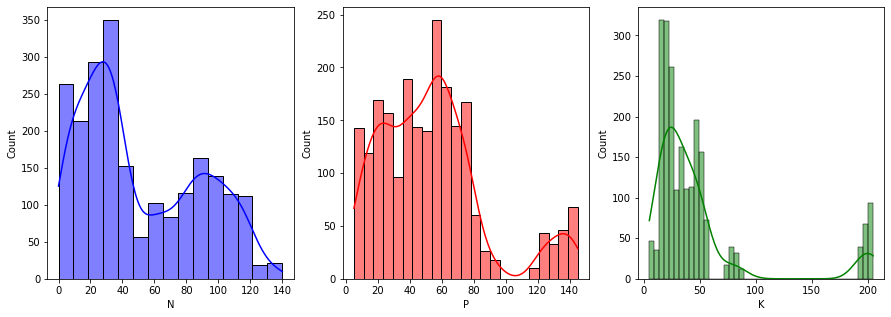

In [32]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
sns.histplot(df['N'],color = 'blue', kde = True)

plt.subplot(1,3,2)
sns.histplot(df['P'],color = 'red', kde = True)

plt.subplot(1,3,3)
sns.histplot(df['K'],color = 'green', kde = True)


<AxesSubplot:xlabel='rainfall', ylabel='Count'>

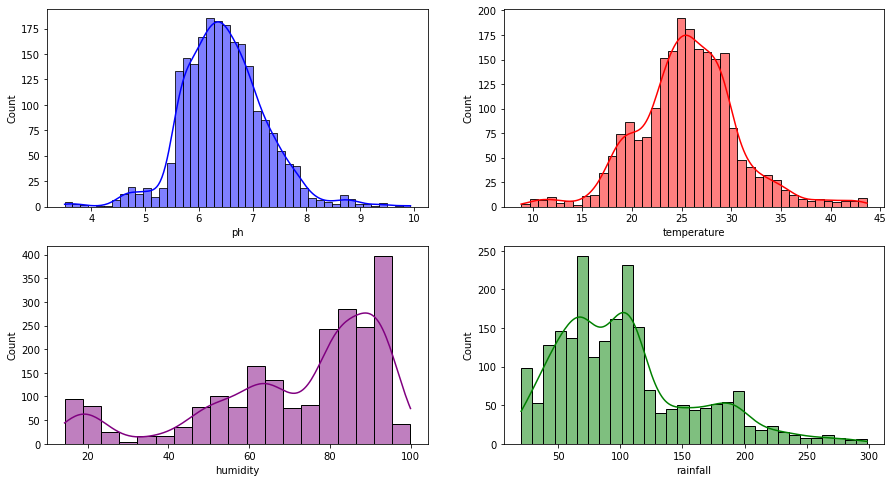

In [33]:
plt.figure(figsize = (15,8))

plt.subplot(2,2,1)
sns.histplot(df['ph'],color = 'blue', kde = True)

plt.subplot(2,2,2)
sns.histplot(df['temperature'],color = 'red', kde = True)

plt.subplot(2,2,3)
sns.histplot(df['humidity'],color = 'purple', kde = True)

plt.subplot(2,2,4)
sns.histplot(df['rainfall'],color = 'green', kde = True)



In [34]:
df_npk = df[['label','N','P','K']]
crop_desc = pd.pivot_table(df_npk, index = 'label', aggfunc= 'mean')
crop_desc.reset_index(inplace = True)
crop_desc

,label,K,N,P
0,apple,199.89,20.80,134.22
1,banana,50.05,100.23,82.01
2,blackgram,19.24,40.02,67.47
3,chickpea,79.92,40.09,67.79
4,coconut,30.59,21.98,16.93
5,coffee,29.94,101.20,28.74
6,cotton,19.56,117.77,46.24
7,grapes,200.11,23.18,132.53
8,jute,39.99,78.40,46.86
9,kidneybeans,20.05,20.75,67.54


In [35]:
fig = px.bar(crop_desc, x = 'label', y = ['N','P','K'], title = "NPK Means by Crop", barmode = 'group',text_auto = '.2s')

fig.update_traces(textposition="outside")
fig.update_layout(uniformtext_minsize=9, uniformtext_mode='show', xaxis_title = 'Crop', yaxis_title = 'kg/ha (Mean)',
legend_title_text = 'Nutrients')
fig.show()

In [36]:
df_weather = df[['label','temperature','rainfall','humidity']]
crop_weather = pd.pivot_table(df_weather, index = 'label', aggfunc= 'mean')
crop_weather.reset_index(inplace = True)
crop_weather

,label,humidity,rainfall,temperature
0,apple,92.333383,112.654779,22.630942
1,banana,80.358123,104.626980,27.376798
2,blackgram,65.118426,67.884151,29.973340
3,chickpea,16.860439,80.058977,18.872847
4,coconut,94.844272,175.686646,27.409892
5,coffee,58.869846,158.066295,25.540477
6,cotton,79.843474,80.398043,23.988958
7,grapes,81.875228,69.611829,23.849575
8,jute,79.639864,174.792798,24.958376
9,kidneybeans,21.605357,105.919778,20.115085


In [37]:
fig = px.box(df, x = 'label', y = 'ph')
fig.show()

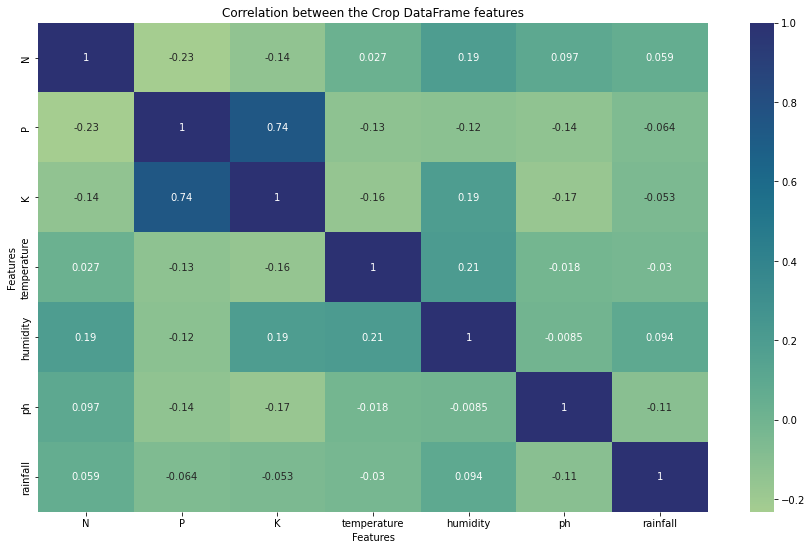

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(df.corr(), annot=True,cmap='crest')
ax.set(xlabel='Features')
ax.set(ylabel='Features')

plt.title('Correlation between the Crop DataFrame features')
plt.show()